# Turki Alsulaimani

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA an in Boston, MA.

 -Addition: 
 
   - you can find the datesets from the links below:
       - Seattle dataset: https://www.kaggle.com/airbnb/seattle/data
       - Boston dataset: https://www.kaggle.com/airbnb/boston

## Bussiness Understanding:
- How many listings are in neighbourhoods?
- How many houses and apartments and others in Both cities?
- Which neighbourhood have the highest price average?
- Which city have the highest rating?
- Which reviews are Negative and Which are Positive?

In [1]:
#Import the packages and set plots to be embedded inline.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

import re
import nltk
from nltk import pos_tag,ne_chunk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.sentiment.vader import SentimentIntensityAnalyzer
"""
if you don't have nltk in your machine, remove the comment to download it.

nltk.download()

"""
sns.set_style('darkgrid')
%matplotlib inline

## Data understanding:

## Data Gathering:

### Seattle:

In [2]:
# Read the .CSV files and save it into dataframes.
Seattle_listings_df = pd.read_csv("Seattle/listings.csv")
Seattle_reviews_df = pd.read_csv("Seattle/reviews.csv")
Seattle_calendar_df = pd.read_csv("Seattle/calendar.csv")

Seattle_listings_df.head() #let's check the listing data first.

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#### the structure of the data set  have: 3818 listing and 92 variables.

In [3]:
Seattle_listings_df.shape 

(3818, 92)

In [4]:
Seattle_listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


#### Explore the columns and which  columns have missing values and what datatypes they are.

In [5]:
Seattle_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

#### Check the calendar_last_scraped column no usefull info here all are scraped in the same date.

In [6]:
list(Seattle_listings_df["calendar_last_scraped"])[:5],list(Seattle_listings_df["calendar_last_scraped"])[-5:]

(['2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04'],
 ['2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04'])

In [7]:
#remove this column have some missing value and we have calculated_host_listings_count column to help us.
Seattle_listings_df["host_listings_count"].value_counts() 

1.0      2179
2.0       620
3.0       261
4.0       151
5.0        98
34.0       67
6.0        48
48.0       46
169.0      39
37.0       37
36.0       36
7.0        30
9.0        28
10.0       26
8.0        23
11.0       22
21.0       21
18.0       19
17.0       16
13.0       12
12.0       12
354.0      10
19.0        4
163.0       4
15.0        3
84.0        2
502.0       2
Name: host_listings_count, dtype: int64

In [8]:
#remove this column have some missing value and we have calculated_host_listings_count column to help us.
Seattle_listings_df["host_total_listings_count"].value_counts() 

1.0      2179
2.0       620
3.0       261
4.0       151
5.0        98
34.0       67
6.0        48
48.0       46
169.0      39
37.0       37
36.0       36
7.0        30
9.0        28
10.0       26
8.0        23
11.0       22
21.0       21
18.0       19
17.0       16
13.0       12
12.0       12
354.0      10
19.0        4
163.0       4
15.0        3
84.0        2
502.0       2
Name: host_total_listings_count, dtype: int64

#### Check the values of experiences_offered column it have no usefull info we can drop it.

In [9]:
Seattle_listings_df["experiences_offered"].value_counts() #remove this columns no valueable information here.

none    3818
Name: experiences_offered, dtype: int64

#### we can see the number of missing values are 656 and the score rating range from 2 to 10

In [10]:
# number of null values in review_scores_value are 656.
Seattle_listings_df["review_scores_value"].value_counts(),sum(Seattle_listings_df["review_scores_value"].isnull()) 

(10.0    1775
 9.0     1137
 8.0      190
 7.0       38
 6.0       16
 4.0        4
 5.0        1
 2.0        1
 Name: review_scores_value, dtype: int64,
 656)

#### The cancellation column have three values  strict, moderate and flexible and There no missing values here.

In [11]:
# have Three value for cancellation_policy Strict, Moderate and Felxible and there no missing values.
Seattle_listings_df["cancellation_policy"].value_counts(),sum(Seattle_listings_df["cancellation_policy"].value_counts()) 

(strict      1417
 moderate    1251
 flexible    1150
 Name: cancellation_policy, dtype: int64,
 3818)

#### calculated_host_listings_count columns have numbers of listing per host


In [12]:
Seattle_listings_df[["calculated_host_listings_count"]].value_counts()

calculated_host_listings_count
1                                 2451
2                                  575
3                                  262
4                                  130
5                                   70
6                                   65
37                                  37
31                                  36
34                                  34
11                                  22
7                                   21
21                                  21
8                                   19
9                                   19
18                                  18
15                                  16
12                                  12
10                                  10
dtype: int64

In [13]:
# Here t mean that the listing are available.
Seattle_listings_df.has_availability.value_counts()

t    3818
Name: has_availability, dtype: int64

#### the price column need to change the type to int and reformate the data.

In [14]:
Seattle_listings_df.price.value_counts(), sum(Seattle_listings_df.price.value_counts())

($150.00    162
 $100.00    159
 $75.00     118
 $99.00     110
 $95.00     110
           ... 
 $204.00      1
 $153.00      1
 $359.00      1
 $490.00      1
 $311.00      1
 Name: price, Length: 273, dtype: int64,
 3818)

#### Here we format the data and make it the same name to be more consistant.

In [15]:
Seattle_listings_df.city.value_counts() #Change this values to Seattle.

Seattle                  3810
West Seattle                2
Seattle                     2
Ballard, Seattle            1
Phinney Ridge Seattle       1
seattle                     1
西雅图                         1
Name: city, dtype: int64

#### Here property_type Column have many range of property and have 2 missing values.

In [16]:
Seattle_listings_df.property_type.value_counts(), sum(Seattle_listings_df.property_type.value_counts())/ Seattle_listings_df.shape[0]

(House              1733
 Apartment          1708
 Townhouse           118
 Condominium          91
 Loft                 40
 Bed & Breakfast      37
 Other                22
 Cabin                21
 Camper/RV            13
 Bungalow             13
 Boat                  8
 Tent                  5
 Treehouse             3
 Dorm                  2
 Chalet                2
 Yurt                  1
 Name: property_type, dtype: int64,
 0.999738082765846)

In [17]:
Seattle_listings_df.neighbourhood_cleansed.value_counts()

Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: neighbourhood_cleansed, Length: 87, dtype: int64

### Explore the review data.

In [18]:
Seattle_reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


#### Data Structure: We have 84849 reviewer and 6 columns.

In [19]:
Seattle_reviews_df.shape

(84849, 6)

#### Explore the columns and which columns have missing values and what data types they are.

In [20]:
Seattle_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


### Explore the calender data.

In [21]:
Seattle_calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


#### Data Structure: We have 1393570 reviewer and 4 columns.

In [22]:
Seattle_calendar_df.shape

(1393570, 4)

#### Explore the columns and which columns have missing values and what data types they are.

In [23]:
Seattle_calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [24]:
#### The column available have to values t for available and f for not abailable.

In [25]:
Seattle_calendar_df.available.value_counts(), sum(Seattle_calendar_df.available.value_counts()) /Seattle_calendar_df.shape[0] 


(t    934542
 f    459028
 Name: available, dtype: int64,
 1.0)

### Boston:

## Data Gathering:

In [26]:
# Read the .CSV files and save it into dataframes.
Boston_listings_df = pd.read_csv("Boston/listings.csv")
Boston_reviews_df = pd.read_csv("Boston/reviews.csv")
Boston_calendar_df = pd.read_csv("Boston/calendar.csv")

Boston_listings_df.head() #let's check the listing data first.

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


#### license have no valuable info and all have missing values so, we can remove it.

In [27]:
Seattle_listings_df["license"],Boston_listings_df["license"]    # remove the license Column from Both Cities.             

(0      NaN
 1      NaN
 2      NaN
 3      NaN
 4      NaN
         ..
 3813   NaN
 3814   NaN
 3815   NaN
 3816   NaN
 3817   NaN
 Name: license, Length: 3818, dtype: float64,
 0      NaN
 1      NaN
 2      NaN
 3      NaN
 4      NaN
         ..
 3580   NaN
 3581   NaN
 3582   NaN
 3583   NaN
 3584   NaN
 Name: license, Length: 3585, dtype: float64)

#### In square_feet column many records have missing values and for our analysis we won't need the square_feet column so, we remove it.

In [28]:
Boston_listings_df["square_feet"].count(),Boston_listings_df.shape[0] # remove this colum it have many missing value that make it useless.

(56, 3585)

#### Here we can see that jurisdiction_names are empty but we can see it can be uesfull in future analysis so we change the data type to String and fill the value with  Massachusetts.

In [29]:
Boston_listings_df["jurisdiction_names"].count(),Boston_listings_df["jurisdiction_names"].dtype # change the data type to String and Change the values to Massachusetts .

(0, dtype('float64'))

#### Here are all the neighbourhood that have a lsiting there.

In [30]:
dict(Boston_listings_df.neighbourhood_cleansed.value_counts())


{'Jamaica Plain': 343,
 'South End': 326,
 'Back Bay': 302,
 'Fenway': 290,
 'Dorchester': 269,
 'Allston': 260,
 'Beacon Hill': 194,
 'Brighton': 185,
 'South Boston': 174,
 'Downtown': 172,
 'East Boston': 150,
 'Roxbury': 144,
 'North End': 143,
 'Mission Hill': 124,
 'Charlestown': 111,
 'South Boston Waterfront': 83,
 'Chinatown': 71,
 'Roslindale': 56,
 'West End': 49,
 'West Roxbury': 46,
 'Hyde Park': 31,
 'Mattapan': 24,
 'Bay Village': 24,
 'Longwood Medical Area': 9,
 'Leather District': 5}

### Explore the review data:

In [31]:
Boston_reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


#### Explore the columns and which columns have missing values and what data types they are.

In [32]:
Boston_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


### Explore the calendar data:

In [33]:
Boston_calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


#### Explore the columns and which columns have missing values and what data types they are.

In [34]:
Boston_calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


### Data Prepration:

#### Changing the value to an approprite one. 

In [35]:
Seattle_listings_df.city = "Seattle"

Boston_listings_df.city = "Boston"
Seattle_listings_df.city.value_counts(),Boston_listings_df.city.value_counts()

(Seattle    3818
 Name: city, dtype: int64,
 Boston    3585
 Name: city, dtype: int64)

#### Changeing the data type of the jurisdiction_names Column and fill it with Massachusetts.

In [36]:
Boston_listings_df["jurisdiction_names"] = Boston_listings_df["jurisdiction_names"].astype("object")
Boston_listings_df["jurisdiction_names"] = "Massachusetts"
Boston_listings_df["jurisdiction_names"].value_counts()

Massachusetts    3585
Name: jurisdiction_names, dtype: int64

#### Changeing the data type of the neighbourhood_group_cleansed to object .

In [37]:
Boston_listings_df["neighbourhood_group_cleansed"] = Boston_listings_df["neighbourhood_group_cleansed"].astype("object")

#### Changeing the data type of the has_availability to object .

In [38]:
Boston_listings_df["has_availability"] = Boston_listings_df["has_availability"].astype("object")

#### Removing the Columns

In [39]:
Seattle_listings_df.drop(columns  = ["host_total_listings_count"],inplace=True)    
Seattle_listings_df.drop(columns  = ["host_listings_count"],inplace=True)   

Boston_listings_df.drop(columns  = ["host_total_listings_count"],inplace=True)    
Boston_listings_df.drop(columns  = ["host_listings_count"],inplace=True)   

#### Making a copy of the datasets.

In [40]:
Seattle_listings_df_copy = Seattle_listings_df.copy()
Boston_listings_df_copy = Boston_listings_df.copy()

Seattle_reviews_df_copy = Seattle_reviews_df.copy()
Boston_reviews_df_copy = Boston_reviews_df.copy()

Seattle_calendar_df_copy = Seattle_calendar_df.copy()
Boston_calendar_df_copy = Boston_calendar_df.copy()

#### Merging the Datasets.

In [41]:
listings_df = Seattle_listings_df_copy.merge(Boston_listings_df_copy,how = "outer")
reviews_df = Seattle_reviews_df_copy.merge(Boston_reviews_df_copy,how = "outer")
calendar_df = Seattle_calendar_df_copy.merge(Boston_calendar_df_copy,how = "outer")

#### Checking the data structure of all data.

In [42]:
listings_df.shape, reviews_df.shape, calendar_df.shape

((7403, 93), (153124, 6), (2702460, 4))

#### Checking the values of property_type.

In [43]:
listings_df.property_type.value_counts()


Apartment          4320
House              2295
Condominium         322
Townhouse           172
Loft                 79
Bed & Breakfast      78
Other                39
Cabin                21
Boat                 20
Camper/RV            14
Bungalow             13
Villa                 6
Tent                  5
Entire Floor          4
Dorm                  4
Treehouse             3
Chalet                2
Guesthouse            1
Yurt                  1
Name: property_type, dtype: int64

## Visualizations:

## Question 1:

### How many houses and apartments and others in Both cities?

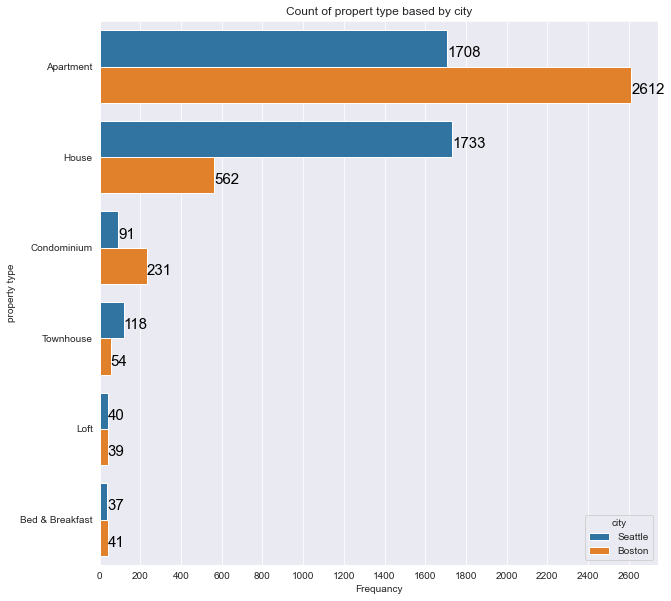

In [44]:
plt.figure(figsize=[10,10])
plt.xticks(np.arange(0, 2601, 200))
orders = listings_df.property_type.value_counts().index[:6]

me = sns.countplot(y = listings_df.property_type,hue=listings_df.city ,order= orders);
plt.title("Count of propert type based by city")
plt.ylabel("property type");
plt.xlabel("Frequancy");

for i in me.patches:
    # get_x pulls left or right; get_height pushes up or down
    me.text(i.get_width(), i.get_y()+.3,i.get_width(), fontsize=15, color='black');


## we can see from the graph above that:

### City Seattle:

####  the highest listings property in Seattle were the House with 1733 listing followed by Apartment with 1708 listings then Town house with 118 listings.

### City Boston:

#### the highest listings property in Boston  were the House with 2612 listing followed by Apartment with 562 listings then Condominium with 231 listings.



## Question 2:

### Which neighbourhood have the highest price average?

In [45]:
listings_df["price"] = listings_df["price"].str.replace(",","")
listings_df["price"] = listings_df["price"].str[1:-3].astype("int64")



In [46]:
Average_price_Based_by_neighbourhood = listings_df.groupby(["neighbourhood_cleansed"])["price"].mean().sort_values(ascending = False)[:10]
Average_price_Based_by_neighbourhood

neighbourhood_cleansed
South Boston Waterfront    306.060241
Bay Village                266.833333
Leather District           253.600000
Back Bay                   240.950331
Downtown                   236.459302
Chinatown                  232.352113
Southeast Magnolia         231.705882
Portage Bay                227.857143
Beacon Hill                224.443299
Fenway                     220.393103
Name: price, dtype: float64

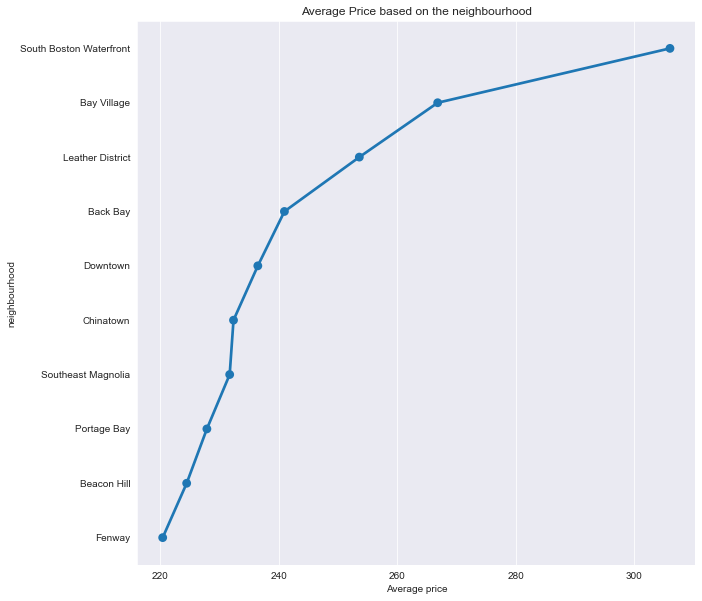

In [47]:
plt.figure(figsize=[10,10])

senes =sns.pointplot(x=Average_price_Based_by_neighbourhood.values,y=Average_price_Based_by_neighbourhood.index)
plt.title("Average Price based on the neighbourhood")
plt.ylabel("neighbourhood");
plt.xlabel("Average price");

for i in senes.patches:
    # get_x pulls left or right; get_height pushes up or down
    senes.text(i.get_width(), i.get_y()+.3,i.get_width(), fontsize=15, color='black');

### our obeservation from the above graph that:
    
####    The highest average price between the neighbourhoods were South Boston waterfront with 306\\$  followed by bay village with 266\$

## Question 3:

### How many listings are in neighbourhoods and which are the highest?

In [48]:
listings_df["price"]

0        85
1       150
2       975
3       100
4       450
       ... 
7398     69
7399    150
7400    198
7401     65
7402     65
Name: price, Length: 7403, dtype: int64

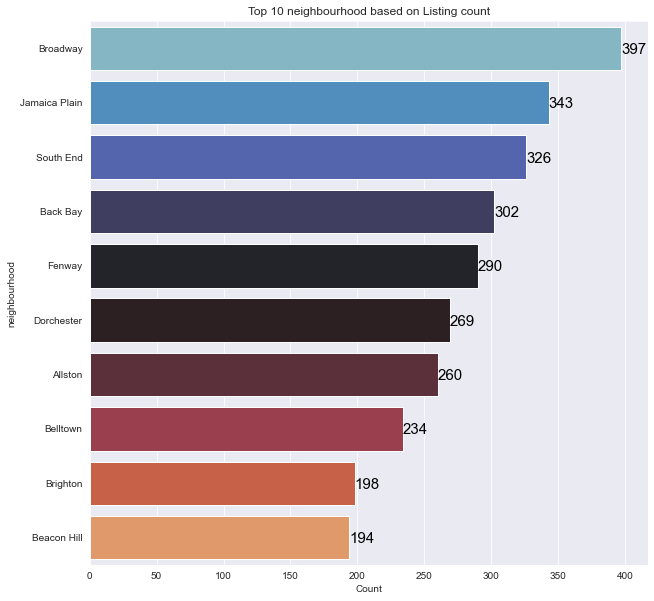

In [49]:
Count_of_host_listing_by_neighbourhood = listings_df.groupby(["neighbourhood_cleansed"])["calculated_host_listings_count"].count()
Count_of_host_listing_by_neighbourhood = Count_of_host_listing_by_neighbourhood.sort_values(ascending=False)[:10]

plt.figure(figsize=[10,10])

senes = sns.barplot(y = Count_of_host_listing_by_neighbourhood.index,
                    x = Count_of_host_listing_by_neighbourhood.values,palette='icefire');

plt.title("Top 10 neighbourhood based on Listing count")

plt.ylabel("neighbourhood");
plt.xlabel("Count");
for i in senes.patches:
    # get_x pulls left or right; get_height pushes up or down
    senes.text(i.get_width(), i.get_y()+.5,str(i.get_width())[:-2], fontsize=15, color='black');
    
    

### We observe from the graph above that:

#### The highest neighbourhood based on how many listing there were Broadway with 397 listing  Followed by Jamica plain, south end, back bay and fenway with 343, 236, 302 and 290 listings respectively.  

## Question 4:

### Which city have the heighest rating ?

In [50]:

listings_df.review_scores_value.value_counts(), sum(listings_df.review_scores_value.value_counts())

(10.0    2952
 9.0     2267
 8.0      524
 7.0       89
 6.0       65
 4.0       16
 2.0        8
 5.0        3
 3.0        2
 Name: review_scores_value, dtype: int64,
 5926)

posx and posy should be finite values
posx and posy should be finite values


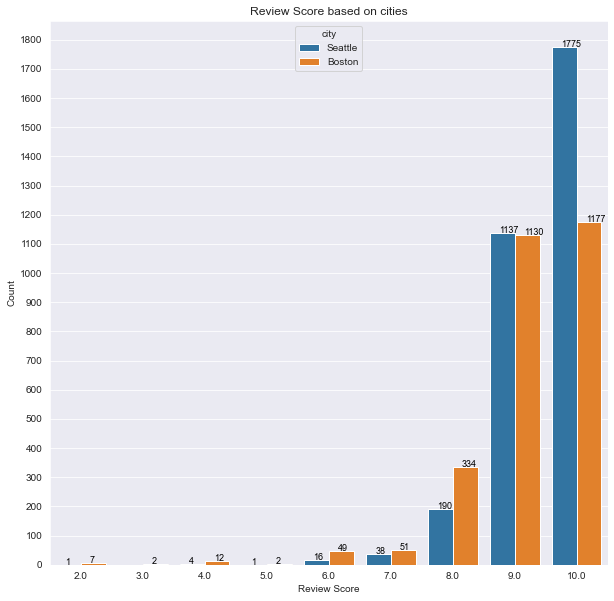

In [51]:
plt.figure(figsize=[10,10])
plt.yticks(np.arange(0,1801,100))

me = sns.countplot(x = listings_df.review_scores_value,hue=listings_df.city );
plt.title("Review Score based on cities")
plt.ylabel("Count");
plt.xlabel("Review Score");

for i in me.patches:
    # get_x pulls left or right; get_height pushes up or down
    me.text( i.get_x()+.15, i.get_height(),str(i.get_height())[:-2], fontsize=9, color='black');

### The most of the reviewers for the two city give a score from 8 to 10. 

### Seattle:
#### Number of reviewers who gave a score of 10 in Seatte are 1775, Number of reviewers who gave a score of 9 in Seatte are 1137 and Number of reviewers who gave a score of 8 in Seatte are 190.
### Boston:
#### Number of reviewers who gave a score of 10 in Seatte are 1177, Number of reviewers who gave a score of 9 in Seatte are 1130 and Number of reviewers who gave a score of 8 in Seatte are 334.

## Question 5:

### Which reviews are Negative and Which are Positive?

In [52]:
sum(reviews_df.comments.isnull())

71

In [53]:
            """
                    **************************************
                It may take at most 40 minutes to run this code 
                    **************************************
                
            """  
""" 
we removed the missing values so it can easlly use any string transformation with making any error.
and how we are focusing in the review comment column and how small number of missing values are we removed these rows.

"""
reviews_df.dropna(subset=["comments"],inplace=True)

def Normalize(text):
    """
    INPUT:
        Take  a single String of text for each row in a dataframes.
    OUTPUT:
        Return a list of words after filltering and removing unnecessary words, steps:
                                                             1-changing the words intext to lower case.
                                                             2-removing numbers and any symbols or punctuations.
                                                             3-remove stop words don't add any meaningfull info.
                                                             4-assign a tag to every word to define if it to a noun,a verb etc
                                                             5-transform every word into their root form.
    """
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]"," ",text)
    text = word_tokenize(text)
    text = [words for words in text if words not in stopwords.words("english")]
    text = pos_tag(text)
    text = [WordNetLemmatizer().lemmatize(w[0], get_wordnet_pos(w[1])) for w in text]
    text = [w for w in text if len(w) > 2]
    text = " ".join(text)
    
    return(text)

def get_wordnet_pos(pos_tag):
    """
    INPUT:
       Take  a single word.    
    OUTPUT:
        return the word with a tag to transform it later to it's root form.
    """
    if pos_tag.startswith('J'):
        
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [54]:
reviews_df["comments_processing"] = reviews_df["comments"].apply(lambda x: Normalize(x))

In [55]:
reviews_df["comments_processing"]

0               cute cozy place perfect location everything
1         kelly great room central location beautiful bu...
2         spacious apartment great neighborhood kind apa...
3         close seattle center offer ballet theater muse...
4         kelly great host accommodate great neighborhoo...
                                ...                        
153119    joe mujer son encantadores habitaci moda limpi...
153120    joe way jamaica marry last day three day stay ...
153121    room clean bathroom kitchen bed also comfortab...
153122    stay low allston joe nancy place fantastic med...
153123    room aprtment clean joe provide many amenity s...
Name: comments_processing, Length: 153053, dtype: object

In [56]:
sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["comments_processing"].apply(lambda x: sid.polarity_scores(x))

In [57]:
reviews_df["sentiments"]

0         {'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'comp...
1         {'neg': 0.0, 'neu': 0.468, 'pos': 0.532, 'comp...
2         {'neg': 0.058, 'neu': 0.535, 'pos': 0.407, 'co...
3         {'neg': 0.079, 'neu': 0.569, 'pos': 0.352, 'co...
4         {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...
                                ...                        
153119    {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'comp...
153120    {'neg': 0.033, 'neu': 0.648, 'pos': 0.319, 'co...
153121    {'neg': 0.019, 'neu': 0.639, 'pos': 0.342, 'co...
153122    {'neg': 0.023, 'neu': 0.59, 'pos': 0.387, 'com...
153123    {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'comp...
Name: sentiments, Length: 153053, dtype: object

In [58]:
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [59]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_processing,neg,neu,pos,compound
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,cute cozy place perfect location everything,0.000,0.374,0.626,0.7717
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,kelly great room central location beautiful bu...,0.000,0.468,0.532,0.9861
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",spacious apartment great neighborhood kind apa...,0.058,0.535,0.407,0.9325
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,close seattle center offer ballet theater muse...,0.079,0.569,0.352,0.8439
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,kelly great host accommodate great neighborhoo...,0.000,0.435,0.565,0.9769


In [60]:
reviews_df[["neg","neu","pos"]].idxmax(axis = 1).value_counts()


neu    94856
pos    57643
neg      554
dtype: int64

In [61]:
Positive = []
Positive = reviews_df[reviews_df[["neg","neu","pos"]].idxmax(axis = 1).values == "pos" ][["comments_processing"]]
Positive

,comments_processing
0,cute cozy place perfect location everything
1,kelly great room central location beautiful bu...
4,kelly great host accommodate great neighborhoo...
5,kelly great place great look clean simple well...
6,kelly great nice neighborhood place stay expec...
...,...
153106,joe nice host bedroom flat great clean easy ce...
153110,wauw nice place easy park spot next house loca...
153114,joe great host room clean welcoming bed comfor...
153116,joe flexible helpful host place clean quiet aw...


In [62]:
Negative = []
Negative = reviews_df[reviews_df[["neg","neu","pos"]].idxmax(axis = 1).values == "neg"] [reviews_df["neg"]> 0.01][["comments_processing"]].reset_index();
Negative.drop(labels = "index",axis = 1,inplace = True )
Negative

<ipython-input-62-d2889de2bf50>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Negative = reviews_df[reviews_df[["neg","neu","pos"]].idxmax(axis = 1).values == "neg"] [reviews_df["neg"]> 0.01][["comments_processing"]].reset_index();


,comments_processing
0,bad
1,die wohnung war sch und sauber checkin war seh...
2,cancel trip
3,die zum unigel nde war uns ein gro pluspunkt
4,war sehr angenehm
5,unfortunately cancel put wrong date host under...
6,mia
7,exactly describe view die
8,bus stop
9,great place location block south pike street b...


In [63]:
!python -m pip install wordcloud

neu    94856
pos    57643
neg      554
dtype: int64

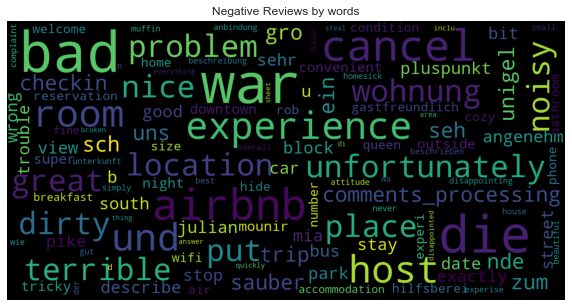

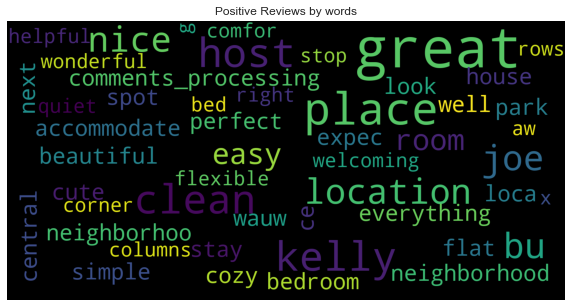

In [64]:
from wordcloud import WordCloud
def show_wordcloud(data):
    wordcloud = WordCloud(background_color = 'black',max_words = 200,max_font_size = 40, scale = 4,
                          random_state = 42).generate(str(data))
    plt.axis('off');
    plt.imshow(wordcloud);
    
# print wordcloud
plt.figure(figsize = (10, 10));
plt.title("Negative Reviews by words")
show_wordcloud(Negative);
plt.figure(figsize = (10, 10));
plt.title("Positive Reviews by words")
show_wordcloud(Positive);
reviews_df[["neg","neu","pos"]].idxmax(axis = 1).value_counts()


### In the Wordcloud above we can see the words give for a positive review and Nagative review.
### We can see that the number of reviewers who gave a Nagative are 554 and We can see that the number of reviewers who gave a Positive are 57643.